In [1]:
import os, shutil, random

In [3]:
import pandas

d = pandas.read_csv('train.csv')

d["diagnosis"].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [4]:
with open("train.csv", "r") as f:
    lines = f.readlines()
    lines = lines[1:]

    data = [[], [], [], [], []]


    for i in lines:
        i = i.split(",")
        data[int(i[1])].append(i[0])


In [5]:
len(data[0])

1805

In [6]:
data[1] = data[1] + data[2] + data[3] + data[4]
data = data[0:2]

In [10]:
len(data)

2

In [9]:
len(data[1])

1857

In [11]:
for i in range(2):
    for j in data[i]:
        shutil.copyfile("train_images/" + j + ".png", f"data/{str(i)}/" + j + ".png")

In [13]:
len(os.listdir("data/1"))

1857

In [1]:
import tensorflow as tf
import os

# for image operations
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

# for building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# for evaluating performance
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# for loading the model
from tensorflow.keras.models import load_model

2023-07-21 11:04:44.600241: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-21 11:04:44.625386: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 11:04:44.805479: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 11:04:44.806335: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 11:04:45.763761: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [15]:
# To avoid Out Of Memory error by setting GPU memory consumption growth rate
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

print("No. Available GPU :", len(gpus))

No. Available GPU : 0


2023-07-18 21:26:48.065655: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-07-18 21:26:48.065714: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: alok-ASUS-TUF-Dash-F15-FX516PC-FX516PCZ
2023-07-18 21:26:48.065719: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: alok-ASUS-TUF-Dash-F15-FX516PC-FX516PCZ
2023-07-18 21:26:48.065838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.54.3
2023-07-18 21:26:48.065867: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  535.54.03  Release Build  (dvs-builder@U16-I2-C03-15-1)  Tue Jun  6 22:31:30 UTC 2023
GCC version:  

In [16]:
data_dir = "data"

In [17]:
img_exts = ["jpeg", "jpg", "bmp", "png"]

In [18]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

002c21358ce6.png
005b95c28852.png
0097f532ac9f.png
00cc2b75cddd.png
00f6c1be5a33.png
0125fbd2e791.png
014508ccb9cb.png
0151781fe50b.png
0182152c50de.png
01d9477b1171.png
01f7bb8be950.png
0212dd31f623.png
022f820027b8.png
0231642cf1c2.png
0232dfea7547.png
02358b47ea89.png
02da652c74b8.png
0304bedad8fe.png
03b373718013.png
0423237770a7.png
04579e31e4be.png
04aef84a2cc1.png
04efb1a284cc.png
050bb1eafa76.png
05113073b268.png
05195a3db5e2.png
05339950962e.png
054b1b305160.png
0551676cc2aa.png
05b1bb2bdb81.png
05e9126dfa5c.png
060e00d1e2ab.png
06be1092a062.png
0709652336e2.png
070d4ce5fd90.png
07596907347b.png
0773a1c326ad.png
07751b94a88a.png
0790515cf5af.png
07a0be6b347f.png
07a2b8cabf6b.png
07e827469099.png
07f5d7baf907.png
08037e4490e5.png
084c02cf077f.png
0851d6a69589.png
08b6e3240858.png
08bef347f40d.png
08ee569d4721.png
08f8838d69bb.png
09237bf783a4.png
0924cec998fa.png
093cf723fede.png
096436d68d06.png
09662e462531.png
099021fac3c9.png
09934421c79e.png
09c8323c612e.png
09f1111a388a.p

In [19]:
print("0 Images : ", len(os.listdir(os.path.join(data_dir, "0"))))
print("1 Images : ", len(os.listdir(os.path.join(data_dir, "1"))))

0 Images :  1805
1 Images :  1857


In [20]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)

        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)

            if tip not in img_exts:
                print("Image format not supported :", image_path)
                os.remove(image_path)
            
            # get file size of image
            file_size = os.path.getsize(image_path) // 1024 # in KB
            if file_size < 10:
                print("Image size too small :", image_path)
                os.remove(image_path)
        
        except Exception as e:
            print("Error :", e)
            # os.remove(image_path)

In [21]:
print("0 Images : ", len(os.listdir(os.path.join(data_dir, "0"))))
print("1 Images : ", len(os.listdir(os.path.join(data_dir, "1"))))

0 Images :  1805
1 Images :  1857


In [23]:
img = cv2.imread(os.path.join("data", "0", "0a4e1a29ffff.png"))

In [24]:
img.shape

(1050, 1050, 3)

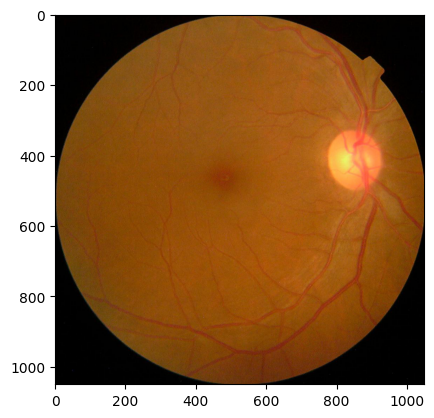

In [25]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
data = tf.keras.utils.image_dataset_from_directory("data") # Building data pipeline

Found 3662 files belonging to 2 classes.


In [27]:
data_iterator = data.as_numpy_iterator() # Allows to iterate through the data

2023-07-18 21:37:25.978243: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3662]
	 [[{{node Placeholder/_4}}]]
2023-07-18 21:37:25.979132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3662]
	 [[{{node Placeholder/_4}}]]


In [28]:
batch = data_iterator.next() # Get the next batch of data

In [29]:
# Images represented as numpy arrays
batch[0].shape # (batch_size, image_height, image_width, channels)

(32, 256, 256, 3)

In [30]:

# Labels
batch[1]

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

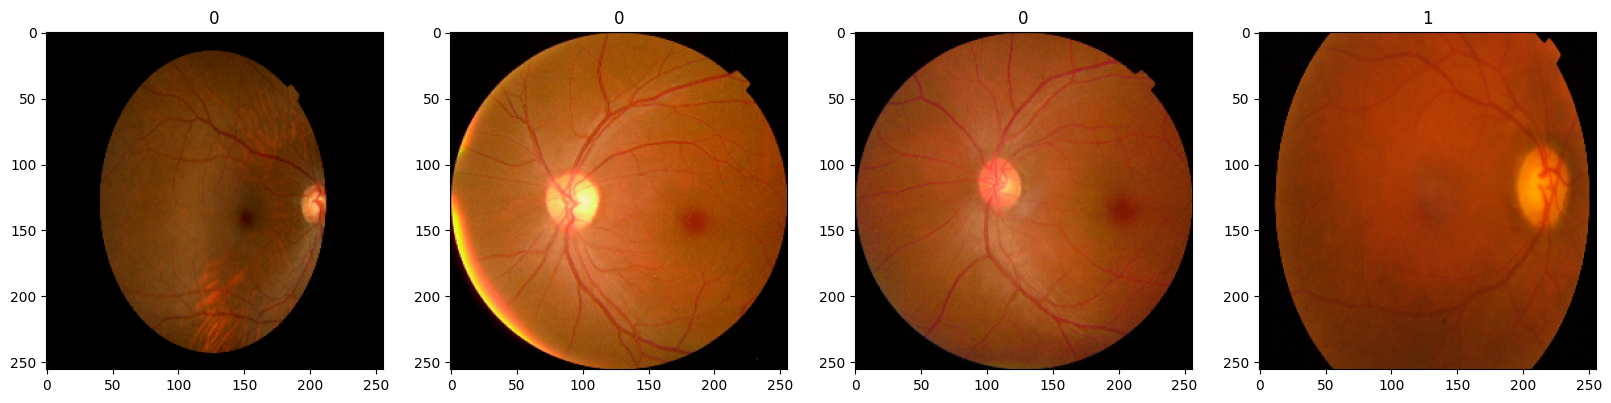

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype("int"))
    ax[idx].title.set_text(batch[1][idx])

In [32]:
data = data.map(lambda x, y : (x / 255, y))

In [33]:
scaled_iterator = data.as_numpy_iterator()

2023-07-18 21:39:38.949563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3662]
	 [[{{node Placeholder/_4}}]]
2023-07-18 21:39:38.949823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3662]
	 [[{{node Placeholder/_4}}]]


In [34]:
scaled_iterator.next()[0].min()

0.0

In [35]:
batch = scaled_iterator.next()

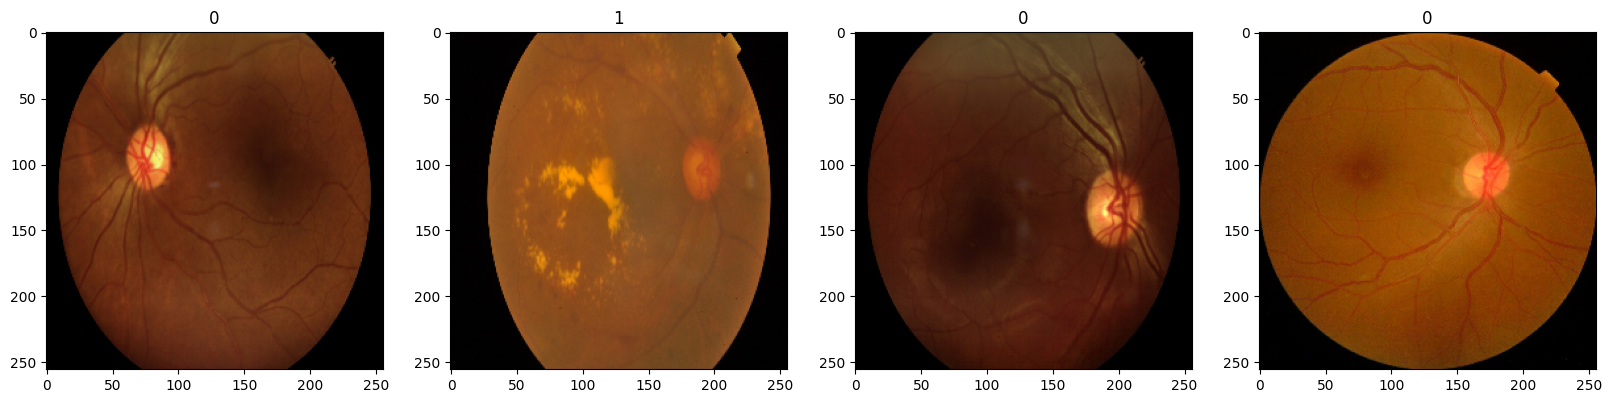

In [36]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [37]:
len(data)

115

In [38]:
training_size = int(len(data) * 0.7)
validation_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)  + 1

In [39]:
print(f"Training Size : {training_size}")
print(f"Validation Size : {validation_size}")
print(f"Test Size : {test_size}")
print()
print(f"Total : {training_size + validation_size + test_size}")

Training Size : 80
Validation Size : 23
Test Size : 12

Total : 115


In [40]:
train = data.take(training_size)
val = data.skip(training_size).take(validation_size)
test = data.skip(training_size + validation_size).take(test_size)

In [2]:
model = Sequential()

2023-07-21 11:04:59.737626: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-07-21 11:04:59.737674: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: alok-ASUS-TUF-Dash-F15-FX516PC-FX516PCZ
2023-07-21 11:04:59.737679: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: alok-ASUS-TUF-Dash-F15-FX516PC-FX516PCZ
2023-07-21 11:04:59.737797: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.54.3
2023-07-21 11:04:59.737820: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  535.54.03  Release Build  (dvs-builder@U16-I2-C03-15-1)  Tue Jun  6 22:31:30 UTC 2023
GCC version:  

In [3]:
# 1st Convolutional Layer
model.add(Conv2D(16, (3, 3), 1, activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

# 2nd Convolutional Layer
model.add(Conv2D(32, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())

# 3rd Convolutional Layer
model.add(Conv2D(16, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())

# Flatten the output of the convolutional layers
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(265, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [4]:
model.compile(optimizer = "adam", loss = tf.losses.BinaryCrossentropy(), metrics = ["accuracy"])
# tf.optimizer.Adam(learning_rate=0.001

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

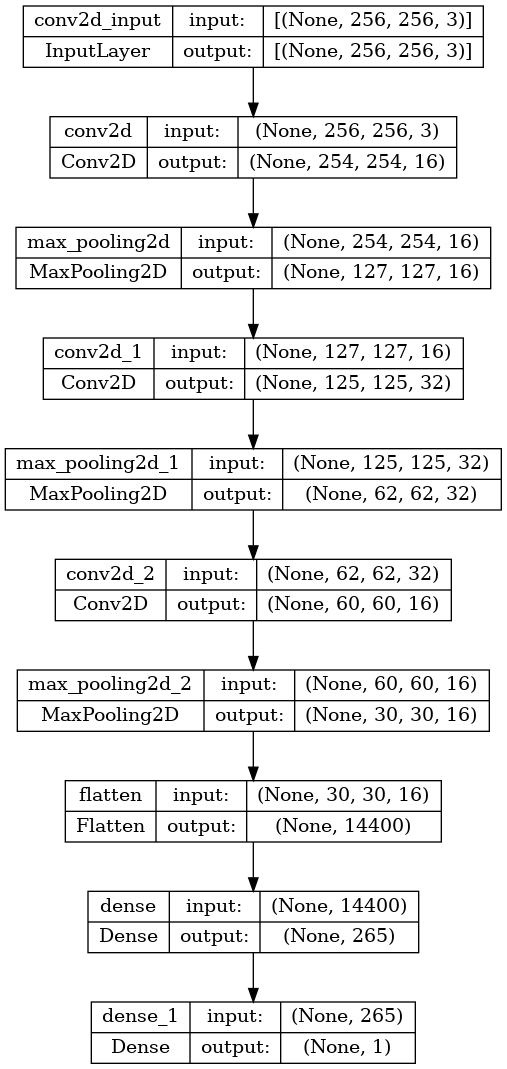

In [6]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [45]:
logdir = "logs"

In [46]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [47]:
hist = model.fit(train, epochs = 6, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/6


2023-07-18 21:43:22.272021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3662]
	 [[{{node Placeholder/_4}}]]
2023-07-18 21:43:22.272307: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3662]
	 [[{{node Placeholder/_4}}]]


80/80 [==============================] - ETA: 0s - loss: 0.3625 - accuracy: 0.8492

2023-07-18 21:44:16.555237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3662]
	 [[{{node Placeholder/_4}}]]
2023-07-18 21:44:16.556124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3662]
	 [[{{node Placeholder/_4}}]]


80/80 [==============================] - 115s 1s/step - loss: 0.3625 - accuracy: 0.8492 - val_loss: 0.2395 - val_accuracy: 0.9171
Epoch 2/6
80/80 [==============================] - 115s 1s/step - loss: 0.2068 - accuracy: 0.9250 - val_loss: 0.2363 - val_accuracy: 0.9171
Epoch 3/6
80/80 [==============================] - 143s 2s/step - loss: 0.1964 - accuracy: 0.9309 - val_loss: 0.2302 - val_accuracy: 0.9307
Epoch 4/6
80/80 [==============================] - 144s 2s/step - loss: 0.1993 - accuracy: 0.9270 - val_loss: 0.2162 - val_accuracy: 0.9334
Epoch 5/6
80/80 [==============================] - 125s 2s/step - loss: 0.1807 - accuracy: 0.9410 - val_loss: 0.2023 - val_accuracy: 0.9389
Epoch 6/6
80/80 [==============================] - 141s 2s/step - loss: 0.1836 - accuracy: 0.9352 - val_loss: 0.2398 - val_accuracy: 0.9185


In [48]:
hist.history

{'loss': [0.3624630868434906,
  0.20679983496665955,
  0.19644078612327576,
  0.19930776953697205,
  0.1806768774986267,
  0.1835784912109375],
 'accuracy': [0.8492187261581421,
  0.925000011920929,
  0.930859386920929,
  0.926953136920929,
  0.9410156011581421,
  0.9351562261581421],
 'val_loss': [0.23947212100028992,
  0.23629020154476166,
  0.23018725216388702,
  0.21615426242351532,
  0.2022790014743805,
  0.2397695779800415],
 'val_accuracy': [0.917119562625885,
  0.917119562625885,
  0.9307065010070801,
  0.9334239363670349,
  0.938858687877655,
  0.91847825050354]}

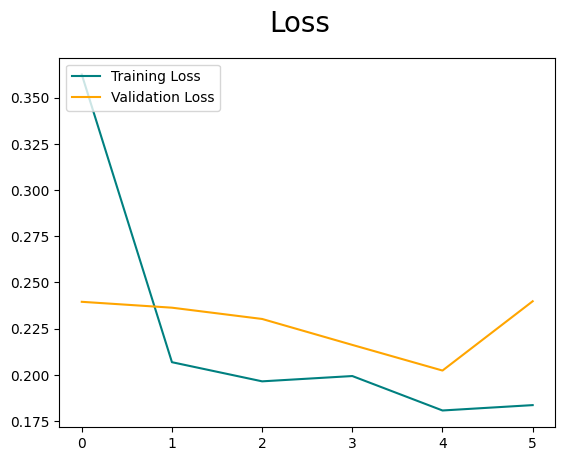

In [49]:
fig = plt.figure()
plt.plot(hist.history["loss"], color = "teal", label = "Training Loss")
plt.plot(hist.history["val_loss"], color = "orange", label = "Validation Loss")
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

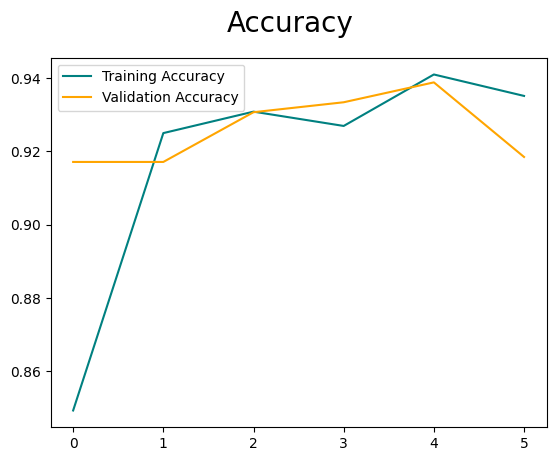

In [50]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color = "teal", label = "Training Accuracy")
plt.plot(hist.history["val_accuracy"], color = "orange", label = "Validation Accuracy")
fig.suptitle("Accuracy", fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [51]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [52]:

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-07-18 21:56:59.468981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3662]
	 [[{{node Placeholder/_4}}]]
2023-07-18 21:56:59.469599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3662]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 126ms/step


In [53]:

print(f"Precision  : {pre.result().numpy()}")
print(f"Recall     : {rec.result().numpy()}")
print(f"Accuracy   : {acc.result().numpy()}")

Precision  : 0.9710982441902161
Recall     : 0.875
Accuracy   : 0.9207650423049927


In [54]:
model.save("myModel.h5")